In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv (r'C:\Users\user\Desktop\Intubed/covid.csv',encoding='ISO-8859-1',parse_dates=[3,4])
df

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,2020-04-05,2020-02-05,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,2020-03-19,2020-03-17,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,2020-06-04,2020-01-04,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,2020-04-17,2020-10-04,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,2020-04-13,2020-04-13,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,01ff60,2,1,2020-05-13,2020-03-05,9999-99-99,97,2,58,97,1,2,2,2,2,2,2,2,2,2,2,3,97
566598,047cd1,1,1,2020-07-04,2020-06-04,9999-99-99,97,2,48,2,2,2,2,2,2,2,2,2,2,2,2,3,97
566599,1beb81,1,2,2020-05-14,2020-01-05,9999-99-99,2,1,49,2,2,2,2,2,2,2,2,1,2,2,99,3,2
566600,16fb02,1,1,2020-05-31,2020-05-29,9999-99-99,97,1,43,2,2,2,2,2,2,2,2,2,2,2,2,3,97


In [3]:
df.drop(['id','patient_type','pregnancy','contact_other_covid','other_disease'],inplace=True,axis=1)

In [4]:
df['days_prior_to_treatment'] = (df['entry_date'] - df['date_symptoms']).dt.days
df['dead']='1'
df.loc[df['date_died']=='9999-99-99','dead']='0'
df.drop(['entry_date','date_symptoms','date_died'],inplace=True,axis=1)
df = df.astype('float64')

In [5]:
df=df.loc[(df['sex']<=2)&(df['intubed']<=2)&(df['pneumonia']<=2)&(df['diabetes']<=2)&(df['copd']<=2)&(df['asthma']<=2)&(df['inmsupr']<=2)&(df['hypertension']<=2)&(df['cardiovascular']<=2)&(df['obesity']<=2)&(df['renal_chronic']<=2)&(df['tobacco']<=2)&(df['covid_res']<=2)&(df['dead']<=2)&(df['icu']<=2)&(df['days_prior_to_treatment']>=0),['sex','age','inmsupr','pneumonia','diabetes','asthma','copd','hypertension','cardiovascular','renal_chronic','obesity','tobacco','days_prior_to_treatment','covid_res','intubed','icu','dead']]

In [6]:
df.loc[df['sex']==2,'sex']=0
df.loc[df['inmsupr']==2,'inmsupr']=0
df.loc[df['pneumonia']==2,'pneumonia']=0
df.loc[df['diabetes']==2,'diabetes']=0
df.loc[df['asthma']==2,'asthma']=0
df.loc[df['copd']==2,'copd']=0
df.loc[df['hypertension']==2,'hypertension']=0
df.loc[df['cardiovascular']==2,'cardiovascular']=0
df.loc[df['renal_chronic']==2,'renal_chronic']=0
df.loc[df['obesity']==2,'obesity']=0
df.loc[df['tobacco']==2,'tobacco']=0
df.loc[df['intubed']==2,'intubed']=0
df.loc[df['icu']==2,'icu']=0
df.loc[df['covid_res']==2,'covid_res']=0

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import class_weight
from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers
import tensorflow as tf
import random as rn

os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(1)
rn.seed(2)
tf.random.set_seed(3)

In [8]:
df=df.loc[df['covid_res']==1,['sex','age','inmsupr','pneumonia','diabetes','asthma','copd','hypertension','cardiovascular','renal_chronic','obesity','tobacco','days_prior_to_treatment','covid_res','intubed','icu','dead']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52681 entries, 2 to 220652
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sex                      52681 non-null  float64
 1   age                      52681 non-null  float64
 2   inmsupr                  52681 non-null  float64
 3   pneumonia                52681 non-null  float64
 4   diabetes                 52681 non-null  float64
 5   asthma                   52681 non-null  float64
 6   copd                     52681 non-null  float64
 7   hypertension             52681 non-null  float64
 8   cardiovascular           52681 non-null  float64
 9   renal_chronic            52681 non-null  float64
 10  obesity                  52681 non-null  float64
 11  tobacco                  52681 non-null  float64
 12  days_prior_to_treatment  52681 non-null  float64
 13  covid_res                52681 non-null  float64
 14  intubed              

In [10]:
df.drop(['days_prior_to_treatment'],inplace=True,axis=1)

In [11]:
df.drop(columns={"covid_res"}, axis=1, inplace=True)

In [12]:
df = df.reset_index(drop=True)

In [13]:
df['dead'].value_counts().to_frame()

,dead
0.0,33968
1.0,18713


In [14]:
# split features and target
X = df.loc[:, df.columns != 'dead'].values
y = np.array(df['dead'])

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

print("Train X: ", X_train.shape)
print("Train y: ", y_train.shape)
print("Test X: ", X_test.shape)
print("Test y: ", y_test.shape)

Train X:  (36876, 14)
Train y:  (36876,)
Test X:  (15805, 14)
Test y:  (15805,)


In [15]:
# normalize age
ageColumnIndex = df.columns.get_loc('age')

mean = X_train[:,ageColumnIndex].mean(axis=0)
X_train[:,ageColumnIndex] -= mean
std = X_train[:,ageColumnIndex].std(axis=0)
X_train[:,ageColumnIndex] /= std

X_test[:,ageColumnIndex] -= mean
X_test[:,ageColumnIndex] /= std

In [16]:
# use SMOTE oversampling method to solve the imbalance problem
X_train_oversampled, y_train_oversampled = SMOTE().fit_resample(X_train, y_train)

print("Oversampled train X: ", X_train_oversampled.shape)
print("Oversampled train y: ", y_train_oversampled.shape)

pd.DataFrame(y_train_oversampled).value_counts()

Oversampled train X:  (47484, 14)
Oversampled train y:  (47484,)


0.0    23742
1.0    23742
dtype: int64

In [17]:
# prepare validation data from train data
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train,
                                                          y_train,
                                                          test_size=0.15,
                                                          random_state=1)

print("Train X: ", X_train_new.shape)
print("Train y: ", y_train_new.shape)
print("Val X: ", X_val.shape)
print("Val y: ", y_val.shape)
print("Test X: ", X_test.shape)
print("Test y: ", y_test.shape)

Train X:  (31344, 14)
Train y:  (31344,)
Val X:  (5532, 14)
Val y:  (5532,)
Test X:  (15805, 14)
Test y:  (15805,)


In [18]:
model = models.Sequential()

model.add(layers.Dense(256, activation = "relu",
                       kernel_regularizer=regularizers.l2(0.001),
                       input_shape = (X_train_new.shape[1],)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation = "relu",
                       kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation = "relu",
                       kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3840      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6

In [19]:
import tensorflow as tf 
model.compile(optimizer=tf.optimizers.Adam(lr=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# use weights to solve the imbalance problem
computed_weights = class_weight.compute_class_weight('balanced',
                                                     np.unique(y_train_new),
                                                     y_train_new)
class_weights = {0: computed_weights[0], 1: computed_weights[1]}

history = model.fit(
    X_train_new,y_train_new,
    epochs=100,
    batch_size=512,
    validation_data = (X_val, y_val),
    verbose=0,
    class_weight=class_weights
)

C:\conda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\conda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0. 1.], y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


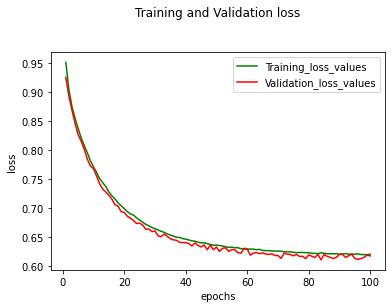

In [27]:
history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)

plt.plot(epochs, history_dict['loss'], 'g', label='Training_loss_values')
plt.plot(epochs, history_dict['val_loss'], 'r', label='Validation_loss_values')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training and Validation loss\n \n')
plt.legend()

plt.show()




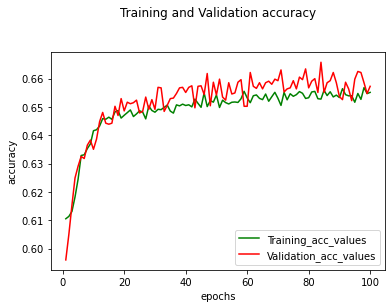

In [28]:
plt.clf()

plt.plot(epochs, history_dict['accuracy'], 'g', label='Training_acc_values' )
plt.plot(epochs, history_dict['val_accuracy'], 'r', label='Validation_acc_values')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation accuracy\n \n')
plt.legend()

plt.show()